In [ ]:
!pip install mysql-connector-python
!pip install mplfinance

In [ ]:
import requests
from bs4 import BeautifulSoup
import mysql.connector

#Base de datos
mydb=mysql.connector.connect(host="eia-scrap.c2xacwacu1dj.us-west-2.rds.amazonaws.com", user="admin",password="EIA2023*",database="sys")
mycursor=mydb.cursor(buffered=True,dictionary=True)
#Parametro de configuracion inicial
headers = {'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/93.0.4577.63 Safari/537.36'}



html_get = requests.get("https://finance.yahoo.com/quote/%5EGSPC/history?p=%5EGSPC", headers = headers).content

soup= BeautifulSoup(html_get,"lxml")
stock_name = soup.find_all("h1",class_="D(ib) Fz(18px)")[0].text
price_data = soup.find_all("tr",class_="BdT Bdc($seperatorColor) Ta(end) Fz(s) Whs(nw)")

for i in price_data:
    date=i.find_all("td")[0].find_all("span")[0].text
    open=i.find_all("td")[1].find_all("span")[0].text.replace(",","")
    high=i.find_all("td")[2].find_all("span")[0].text.replace(",","")
    low=i.find_all("td")[3].find_all("span")[0].text.replace(",","")
    close=i.find_all("td")[4].find_all("span")[0].text.replace(",","")
    ad_close=i.find_all("td")[5].find_all("span")[0].text.replace(",","")
    volume=i.find_all("td")[6].find_all("span")[0].text.replace(",","")
    id=1001029639
    mycursor.execute("INSERT INTO sys.Price_stock (Date,Open,Close,High,Low,Adjclose,Volume,student) VALUES (%s,%s,%s,%s,%s,%s,%s,%s)",(date,open,close,high,low,ad_close,volume,id))
    mydb.commit()

print(stock_name)
print(price_data)


In [ ]:
import mysql.connector
import mplfinance as mpf

import matplotlib.pyplot as plt
import pandas as pd



mydb=mysql.connector.connect(host="eia-scrap.c2xacwacu1dj.us-west-2.rds.amazonaws.com", user="admin",password="EIA2023*",database="sys")
mycursor=mydb.cursor(buffered=True,dictionary=True)

mycursor.execute("SELECT * FROM sys.Price_stock WHERE student = 1001029639")

list_price_stock= mycursor.fetchall()
print(list_price_stock)



<Figure size 640x480 with 0 Axes>

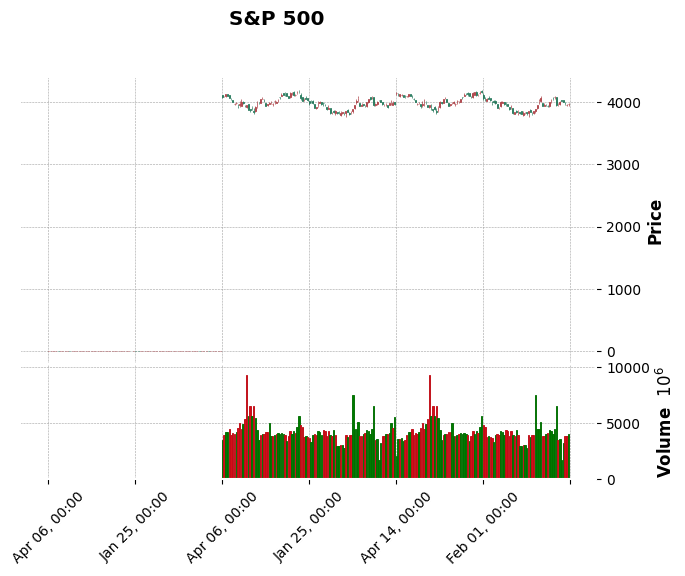

In [ ]:
df=pd.DataFrame(list_price_stock)
df['Date']=pd.to_datetime(df["Date"],format="%b %d, %Y")

df.set_index("Date",inplace=True)
plt.figure(1)

mpf.plot(df,type="candle",style="charles",volume=True,title="S&P 500")

REGRESION


coeficiente  -0.0322553258466011
Origen 13.86306373118494


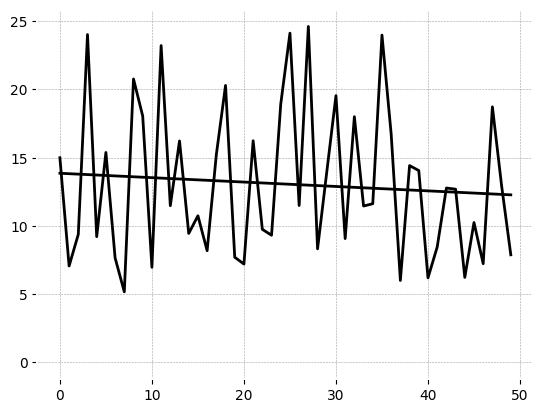

In [ ]:
from sklearn import linear_model
import matplotlib.pyplot as plt

import numpy as np

n_samples=50
X=np.zeros((n_samples,2))
y=np.zeros((n_samples,2))

X[:,0]=np.array(list(range(n_samples)))
y[:,0]=5+np.random.rand(n_samples)*20

#GENERACION DE DATOS ALEATORIOS

linear_regression=linear_model.LinearRegression()
linear_regression.fit(X,y)

#Coeficientes
m=linear_regression.coef_
w=linear_regression.intercept_
print('coeficiente ',m[0][0])
print('Origen', w[0])


y_predicted=linear_regression.predict(X)




plt.plot(X,y,"k-")

plt.plot(X,y_predicted,"k-")

plt.show()

Segunda practica de modelo lineal

In [ ]:
from sklearn import linear_model, datasets
import matplotlib.pyplot as plt
import numpy as np


.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, total serum cholesterol
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, total cholesterol / HDL
      - s5      ltg, possibly log of serum triglycerides level
      - s6      glu, blood sugar level

Note: Each of these 1

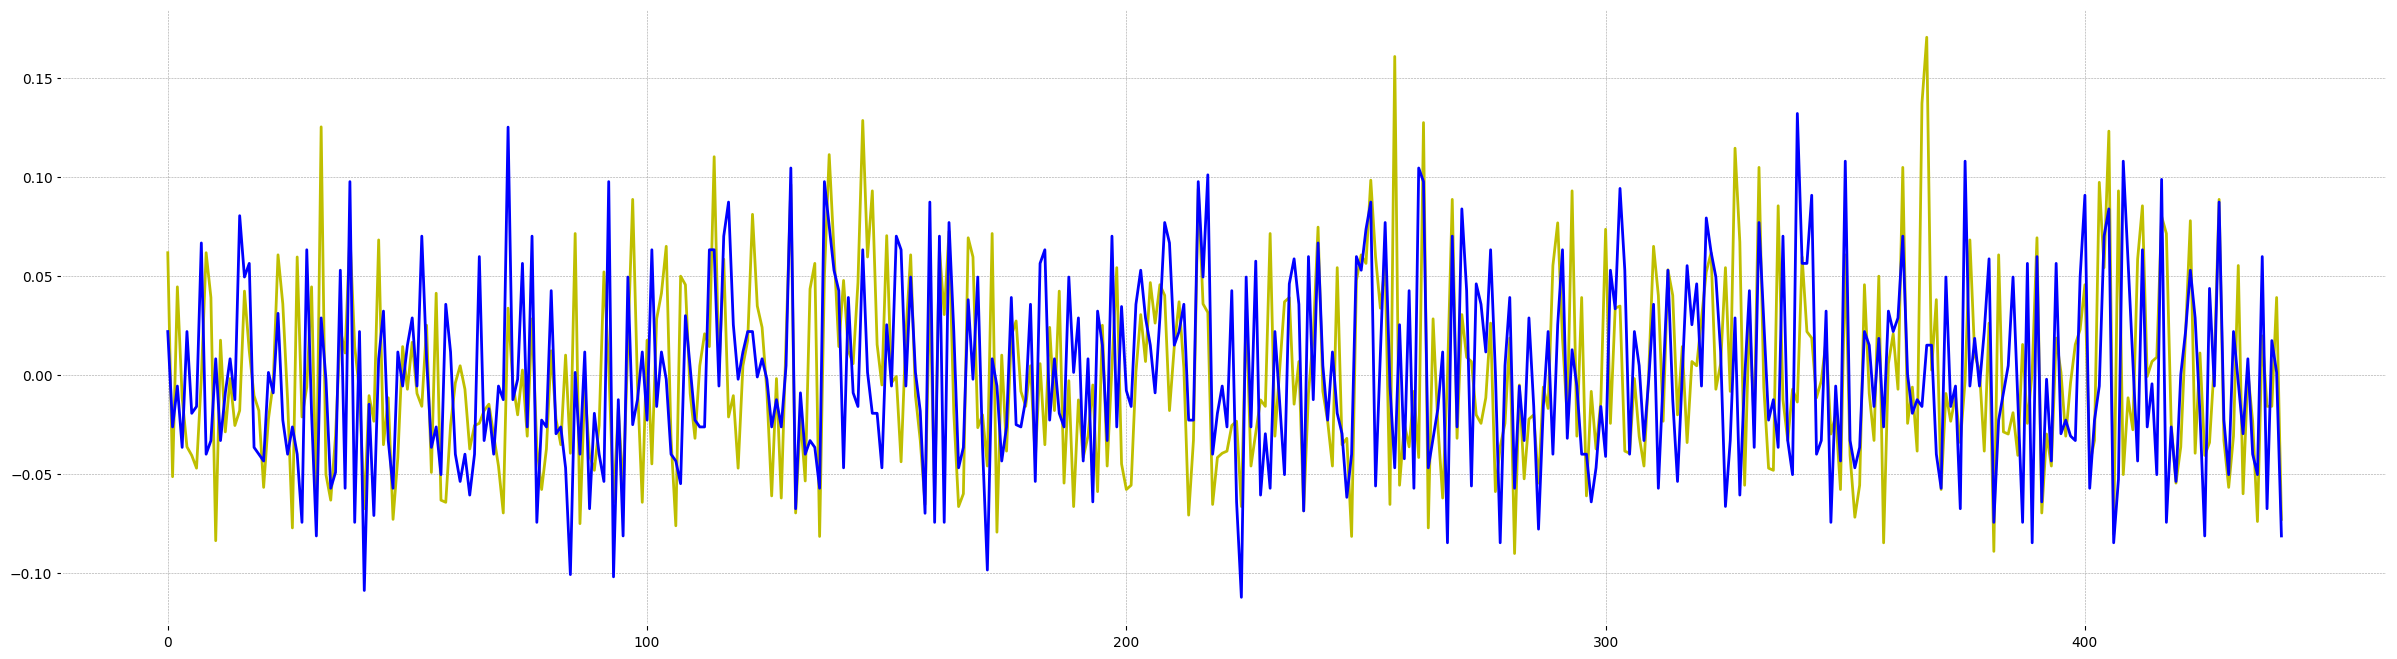

In [ ]:
diabetes=datasets.load_diabetes()
#print(diabetes.DESCR)


target=diabetes.target
mass_body=diabetes.data[2]
print(diabetes.DESCR)
X=diabetes.data
y=diabetes.target

plt.figure(figsize=(30,8))
x=range(0,diabetes.data.shape[0],1)


plt.plot(x,X[:,2],"y-",label="MASS INDEX")
plt.plot(x,X[:,3],"b-",label="Blood P")



PCA: Utiliza procesos para volver varios features que se tienen en un dataset en uno solo que ayudará al modelo a mejorar su accurate o dará una mejor ecuación para el modelo.


Errores de train 3878.676127518841
Errores de test 3928.05777591204


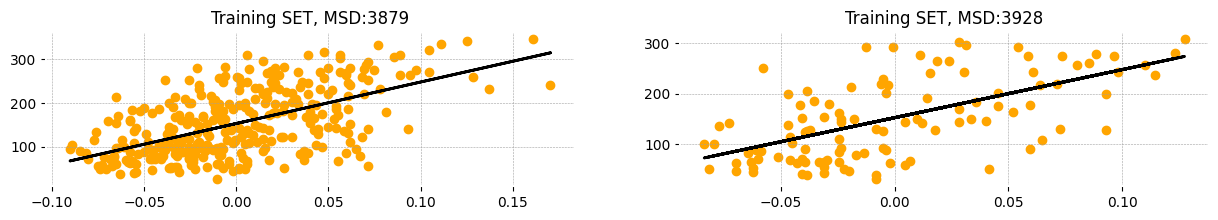

In [ ]:
from matplotlib import axis


#IMPORT IMPORTANTE PARA EL CURSO = clase test_training
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split


#COMPONENTES PARA LA REGRESION LINEAL
X= diabetes.data[:,np.newaxis,2]

X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=10)

linear_regression= linear_model.LinearRegression()

linear_regression.fit(X_train,y_train)

y_train_predicted=linear_regression.predict(X_train)
y_test_predicted= linear_regression.predict(X_test)


#Error minimo cuadratico al final del aprendizaje
train_MSD= mean_squared_error(y_train,y_train_predicted)
test_MSD= mean_squared_error(y_test,y_test_predicted)

print("Errores de train",train_MSD )
print("Errores de test",test_MSD)

fig,axs = plt.subplots(1,2,figsize=(15,2))

axs[0].scatter(X_train,y_train,color="orange")
axs[0].plot(X_train,y_train_predicted,color="black")
axs[0].set_title('Training SET, MSD:{:.0f}'.format(train_MSD))



axs[1].scatter(X_test,y_test,color="orange")
axs[1].plot(X_test,y_test_predicted,color="black")
axs[1].set_title("Training SET, MSD:{:.0f}".format(test_MSD))

plt.show()
